# Data Cleaning

In [3]:
# Imports
import pandas as pd

Mainly 3 things to do :
* Process data to be able to manipulate it (convert "object" to "float)
* Remove missing data
* Detect wrong data

## Loading data

Just for one file.

In [4]:
df = pd.read_csv("data/curva_pibc_uof_2024020101.csv", delimiter=";", encoding="latin1", header=1)
del df["Unnamed: 8"]
df.head()

,Hora,Fecha,Pais,Unidad,Tipo Oferta,Energía Compra/Venta,Precio Compra/Venta,Ofertada (O)/Casada (C)
0,1.0,01/02/2024,MI,WMVD101,C,"0,2","1.002,00",O
1,1.0,01/02/2024,MI,WMVD147,C,"0,1","1.002,00",O
2,1.0,01/02/2024,MI,IBEVD15,C,"2,0","801,00",O
3,1.0,01/02/2024,MI,IBEVD14,C,"2,0","801,00",O
4,1.0,01/02/2024,MI,NXVD219,C,"49,5","700,00",O


In [5]:
df.dtypes

Hora                       float64
Fecha                       object
Pais                        object
Unidad                      object
Tipo Oferta                 object
Energía Compra/Venta        object
Precio Compra/Venta         object
Ofertada (O)/Casada (C)     object
dtype: object

## Removing missing data

In [6]:
df = df.dropna()

## Processing data

### Hora, Pais, Unidad, Tipo Oferta, Ofertada/Casada

Nothing to do

### Fecha

Convert objects into datetimes

In [7]:
df.Fecha.iloc[0]

'01/02/2024'

In [8]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

### Energia Compra/Venta, Precio Compra/Venta

Convert from string to float replacing :
* Thousand delimiter "." to nothing
* Decimal delimiter "," to "."

In [9]:
a = "1.500,00"
a = a.replace(".", "")
a = a.replace(",", ".")
a = float(a)
print(a)

1500.0


In [10]:
df["Energía Compra/Venta"] = df["Energía Compra/Venta"].apply(lambda x: float(x.replace(".", "").replace(",", ".")))
df["Precio Compra/Venta"] = df["Precio Compra/Venta"].apply(lambda x: float(x.replace(".", "").replace(",", ".")))
df.dtypes

Hora                              float64
Fecha                      datetime64[ns]
Pais                               object
Unidad                             object
Tipo Oferta                        object
Energía Compra/Venta              float64
Precio Compra/Venta               float64
Ofertada (O)/Casada (C)            object
dtype: object

## Cutting wrong data

First, let's visualize the data where things mights go wrong :
* Energy
* Price

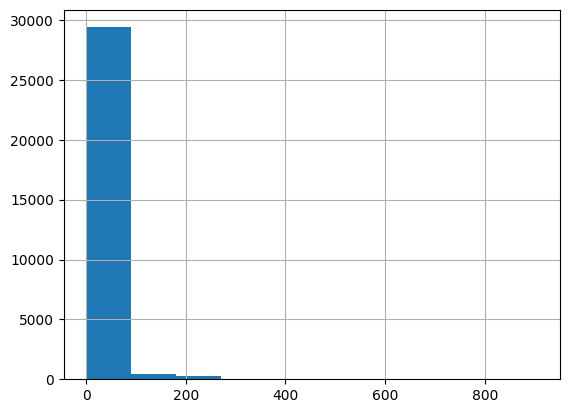

In [11]:
df["Energía Compra/Venta"].hist();

No problem with energy values

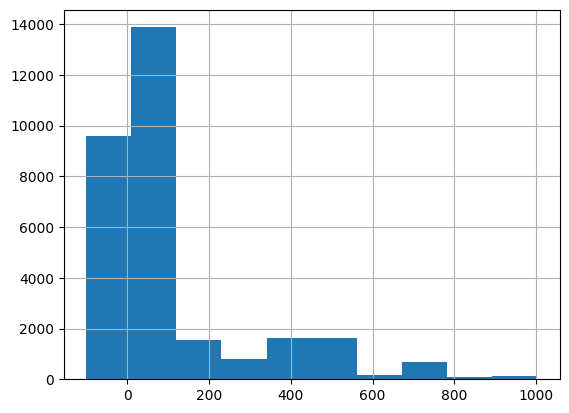

In [12]:
df["Precio Compra/Venta"].hist();

We might (and we would) have problems of negative prices. To focus on the central data, we might define threshold values for the visualisation :
* Cut prices under -5€/MW
* Cut prices over +1000€/MW

In [13]:
# df = df[(df['Precio_Compra_Venta'] >= -5) & (df['Precio_Compra_Venta'] <= 1000)]

## Saving file & Testing the whole

In [72]:
import pandas as pd

# Definir una función para cargar y procesar cada archivo individualmente
def cargar_y_procesar_archivo(file_path):

    # Cargar el archivo CSV
    df = pd.read_csv(file_path, encoding='latin1', sep=';', skiprows=2)
    # Renombrar las columnas
    df.columns = ['Hora', 'Fecha', 'Pais', 'Unidad', 'Tipo_Oferta', 'Energía_Compra_Venta','Precio_Compra_Venta', 'Ofertada_Casada', 'Unnamed']
    # Eliminar la columna 'Unnamed'
    df.drop(columns=['Unnamed'], inplace=True)

    # Suprimir los datos que faltan
    df.dropna(inplace=True)

    # Modificar tipos de datos:

    #1 'Hora' modificar la hora para números enteros.
    df['Hora'] = df['Hora'].astype(int)
    #2 'Fecha' modificar las fechas actuales de los archivos.csv 
    df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
    #3 'Energía_Compra_Venta' modificar los valores flotantes despues de reemplazar comas por puntos.
    df['Energía_Compra_Venta'] = df['Energía_Compra_Venta'].str.replace(".", "").str.replace(',', '.').astype(float)
    #4 'Precio_Compra_Venta' modificar los valores flotantes despues de reemplazar comas por puntos.
    df['Precio_Compra_Venta'] = df['Precio_Compra_Venta'].str.replace('.', '').str.replace(',', '.').astype(float)

    # A continuación,se eliminaran los valores límites que nos estaban distorsionando la señal de precios del OMIE.
    # Creación de un data_frame_filtrado, Nuestra condición de operación de datos es entre un intervalo de precios de [>-4€/Mwh,<1500€/Mwh] 
    
    #df = df[(df['Precio_Compra_Venta'] >= -5) & (df['Precio_Compra_Venta'] <= 1000)]

    # Se guarda la dataframe en el mismo archivo (para esta simulacion, no se hace)
    #df.to_csv(file_path, index=False, sep=";", encoding="latin-1")

    # Liberar espacio en la memoria
    del df

In [73]:
df.to_csv("data/curva_pibc_uof_2024020101_limpio.csv", index=False, encoding="latin-1")

In [74]:
# Compute data_cleaning if files have just been downloaded
import os
date="2024-02"
folder_path = "app/extracted/curva_pibc_uof_" + date.replace("-", "")
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    if os.path.isfile(file_path):
        print(file_path)
        dg = pd.read_csv(file_path, encoding='latin1', sep=';', header=1)
        print(dg.columns)
        cargar_y_procesar_archivo(file_path)
    else:
        print("I don't exist")

app/extracted/curva_pibc_uof_202402\curva_pibc_uof_2024020101.csv
Index(['Hora', 'Fecha', 'Pais', 'Unidad', 'Tipo Oferta',
       'Energía Compra/Venta', 'Precio Compra/Venta',
       'Ofertada (O)/Casada (C)', 'Unnamed: 8'],
      dtype='object')
app/extracted/curva_pibc_uof_202402\curva_pibc_uof_2024020102.csv
Index(['Hora', 'Fecha', 'Pais', 'Unidad', 'Tipo Oferta',
       'Energía Compra/Venta', 'Precio Compra/Venta',
       'Ofertada (O)/Casada (C)', 'Unnamed: 8'],
      dtype='object')
app/extracted/curva_pibc_uof_202402\curva_pibc_uof_2024020103.csv
Index(['Hora', 'Fecha', 'Pais', 'Unidad', 'Tipo Oferta',
       'Energía Compra/Venta', 'Precio Compra/Venta',
       'Ofertada (O)/Casada (C)', 'Unnamed: 8'],
      dtype='object')
app/extracted/curva_pibc_uof_202402\curva_pibc_uof_2024020104.csv
Index(['Hora', 'Fecha', 'Pais', 'Unidad', 'Tipo Oferta',
       'Energía Compra/Venta', 'Precio Compra/Venta',
       'Ofertada (O)/Casada (C)', 'Unnamed: 8'],
      dtype='object')
app/extr

If the previous cell worked, then the code is good !